# Import the libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/Speed Dating Data.csv")
print(f'There is {data.shape[0]} rows and {data.shape[1]} columns in this dataset')
print(f'Overall missing values: \n{100*data.isnull().sum()/data.shape[0]}')

There is 8378 rows and 195 columns in this dataset
Overall missing values: 
iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64


## EDA
We'll conduct a gender analysis checking what is the distribution of female and men at each step *(=wave)*

- Most participants are at the _11th_ and _21th_ wave

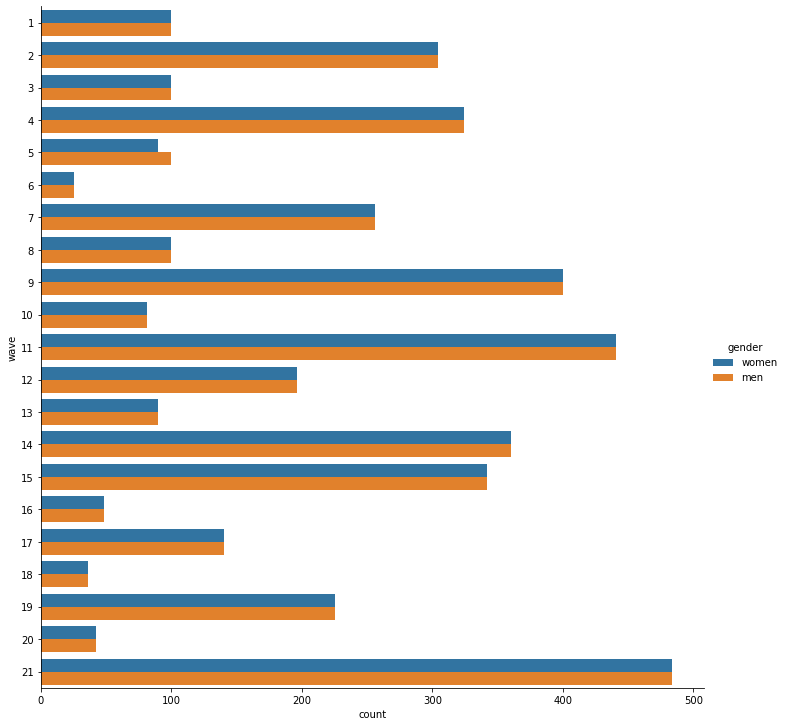

In [3]:
#Map the gender to ease the treatment and display
data['gender'] = data['gender'].map({0:'women', 1:'men'})
g = sns.catplot( y = "wave", hue = "gender", data = data, height = 10, kind = "count")

Let's check the age of the participants at each step _(=wave)_
- Youngest men & women were located in the _5th_ wave
- Oldest men were located in the _18th_ wave
- Oldest women were located in the _6th_ wave

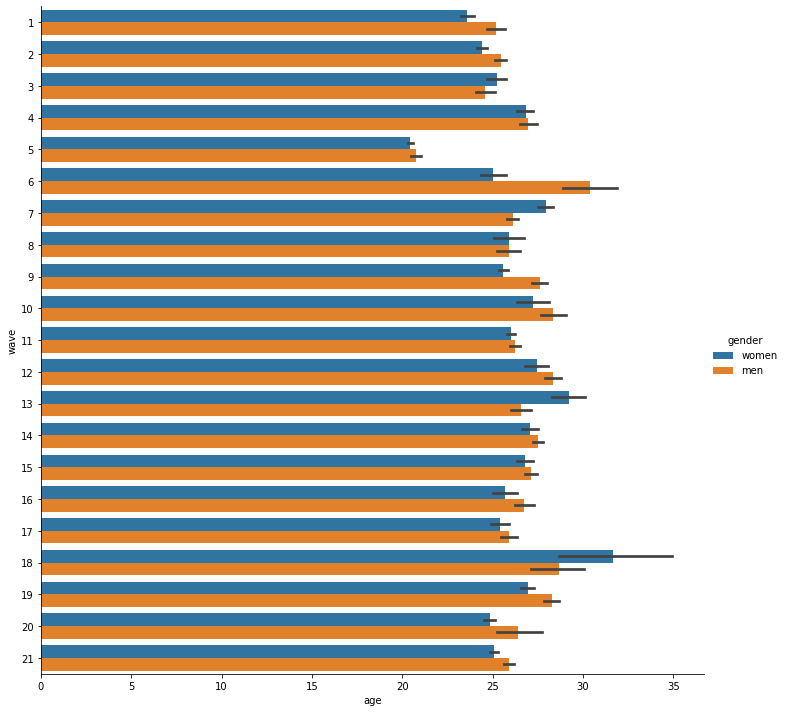

In [4]:
g = sns.catplot(y = "wave", x = "age", hue= "gender", data = data, size = 10, kind = "bar", orient = 'h')

Race distribution in the dataset 
- Lowest minority represented in men is Native American
- Lowest minority represented in women is Black/African American 
- Most represented is European/Caucasian American

We can therefore assume the data was collected in a state populated mostly by White socio-demographics, we'll check that further on

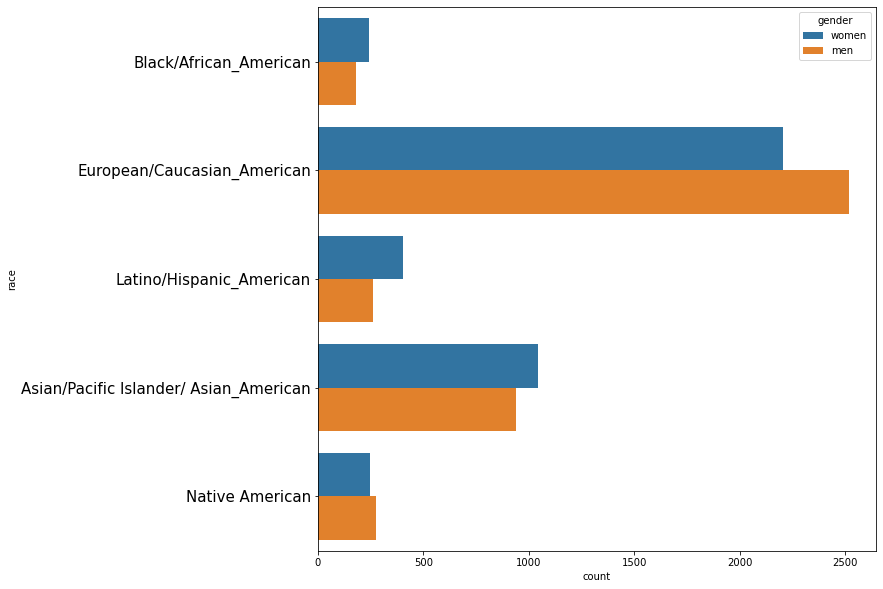

In [5]:
race = ['Black/African_American', 'European/Caucasian_American', 'Latino/Hispanic_American', 'Asian/Pacific Islander/ Asian_American', 'Native American']
g = plt.figure(figsize = (10,10))
g = sns.countplot(y = 'race', data = data, hue = 'gender')
g.set(yticklabels=race)
g = plt.yticks (rotation = 0, fontsize = 15)

What are the participants studying at the time of the speed dating ? 
- Most men are studying History, Religion or Philosophy
- Most women are studying Finance or Economics


- We notice men are predominent in Law, Pharmaceuticals or Biotech, History, Religion, Philosophy, Education, Social work and Architecture studies
- While women are predominent in Social or Psychology, English, Creative writing, Finance or Economics, Chemistry, Biology or Physics, Film and Arts


- Regarding the undergrads women are predominent as well, could they be younger ? 

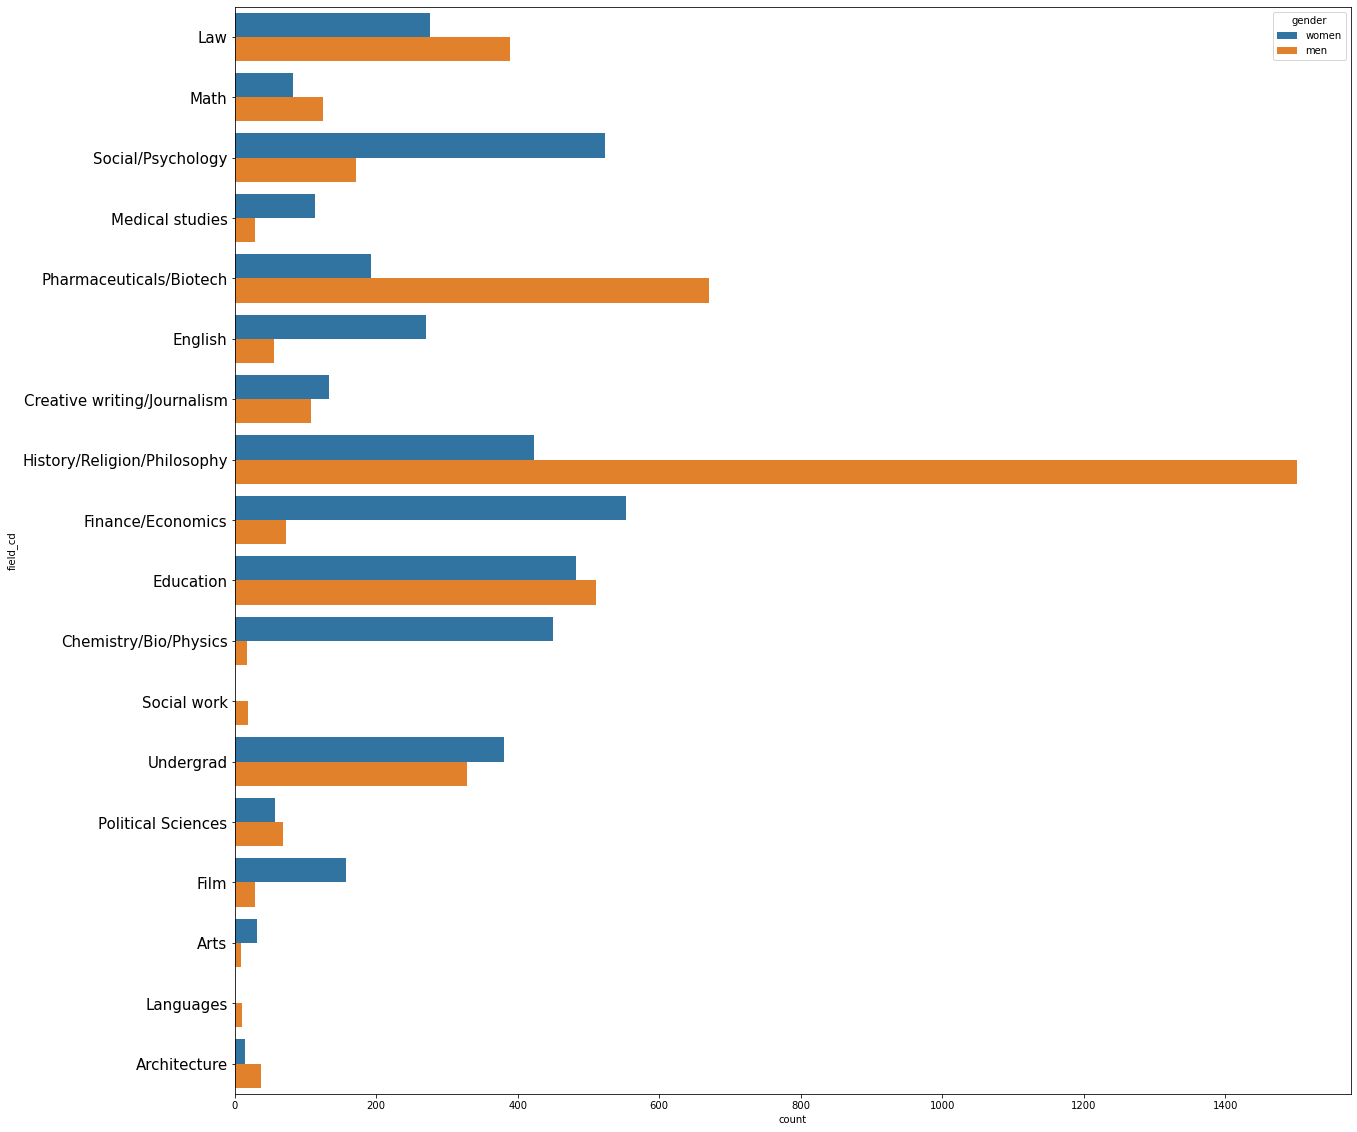

In [6]:
field_cd = ['Law', 'Math', 'Social/Psychology', 'Medical studies', 'Pharmaceuticals/Biotech',
             'English', 'Creative writing/Journalism','History/Religion/Philosophy',
             'Finance/Economics', 'Education', 'Chemistry/Bio/Physics', 'Social work', 'Undergrad',
             'Political Sciences', 'Film', 'Arts', 'Languages', 'Architecture']

g = plt.figure(figsize = (20,20))
g = sns.countplot(y = 'field_cd', data = data, hue = 'gender')
g.set(yticklabels = field_cd)
g = plt.yticks(rotation = 0, fontsize = 15)

Are these participants studies related to their intended career choice ? 

- We clearly notice that men are looking forward to Banking, consulting, finance careers, Marketing, entrepreneur over women, it's quite odd as there was a clear separation in the field studied.


This could be explained by the fact that the finance/business category is grouped with Marketing and entrepreneur, these fields allow an easier career change usually maybe it wasn't the case back in 2004. 

- We can notice women are tending more to Academic or Research careers

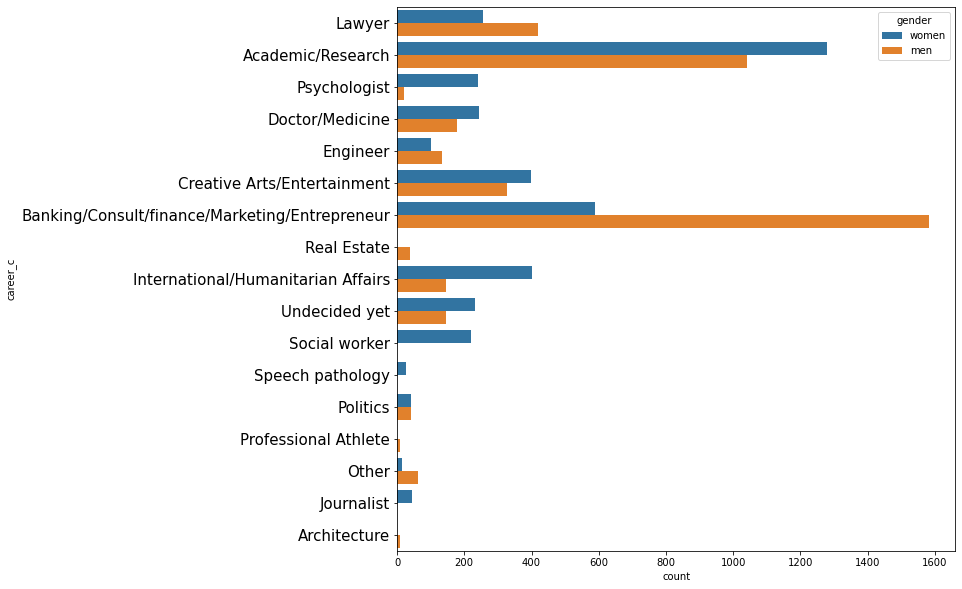

In [7]:
intended_career = ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'Engineer',
                     'Creative Arts/Entertainment', 'Banking/Consult/finance/Marketing/Entrepreneur',
                     'Real Estate', 'International/Humanitarian Affairs', 'Undecided yet', 'Social worker',
                     'Speech pathology', 'Politics', 'Professional Athlete', 'Other', 'Journalist', 'Architecture']

g = plt.figure(figsize = (10,10))
g = sns.countplot(y = "career_c", data = data, hue = 'gender') 
g.set(yticklabels = intended_career)
g = plt.yticks(rotation = 0, fontsize = 15)

**Unique characteristics**

As we can see with the data key that was given, anyone in the dataset can be attending multiple "rounds" during the dates

Therefore we can look at their unique characteristics to dig further. We'll drop as well the duplicate column _"id"_ while cleaning up the _"iid"_

In [8]:
# a person attend several rounds of meetings.
#we can just focus on its unique characteristics.
data_clean = data[['iid', 'wave',
            'gender', 'age', 'field', 'field_cd', 'undergra',
            'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
            'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
            'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
            'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
            'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
            'expnum','match_es',
            'match','dec',
            'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
            'met','satis_2', 'length', 'numdat_2',
            'you_call', 'them_cal', 'date_3', 'numdat_3',
            'num_in_3']].drop_duplicates(subset=['iid'])
data_clean.describe()

,iid,wave,age,field_cd,race,imprace,imprelig,goal,date,go_out,...,prob,met,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
count,551.000000,551.000000,543.000000,544.000000,545.000000,544.000000,544.000000,544.000000,543.000000,544.000000,...,536.000000,534.000000,485.000000,485.000000,482.000000,263.000000,263.000000,263.000000,93.000000,40.000000
mean,276.787659,11.083485,26.359116,7.549632,2.800000,3.733456,3.582721,2.148897,4.983425,2.143382,...,5.177239,0.986891,5.676289,1.861856,2.311203,0.749049,0.889734,0.357414,1.172043,0.875000
std,159.494486,6.013947,3.766960,3.772699,1.253818,2.842181,2.784553,1.448273,1.468520,1.104833,...,2.187544,0.975217,1.804595,0.976738,0.690475,1.729225,1.301500,0.480152,1.185269,0.757442
min,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139.500000,6.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,...,4.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,277.000000,11.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,...,5.000000,1.000000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,414.500000,15.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,...,7.000000,2.000000,7.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,552.000000,21.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,...,10.000000,2.000000,10.000000,3.000000,3.000000,21.000000,9.000000,1.000000,9.000000,4.000000


In [9]:
percentage_women = (data_clean['gender'].value_counts().min())/(data_clean['gender'].value_counts().sum())
percentage_women = percentage_women * 100
print('{:0.2f}% of women in this dataset'.format(percentage_women))

49.73% of women in this dataset


We can notice here we have quite an equal repartition, roughly 49,73% of our dataset is women based.

Checking the age distribution regardless of gender, we can notice an outlier around 54 years old
- Participants age is around 25-26 years old, which can be verified with the average standing at 26 years and 4 months

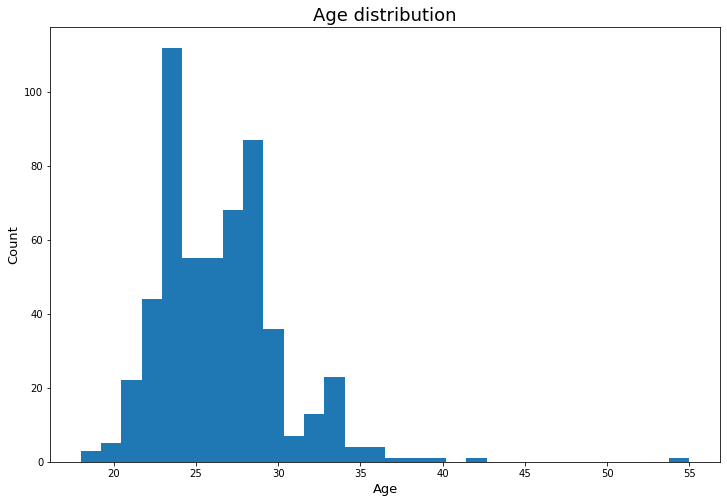

In [10]:
ax = data_clean.age.hist(bins = 30, figsize = (12,8))
ax.set_title('Age distribution', fontsize = 18)
ax.set_xlabel('Age', fontsize = 13)
ax.set_ylabel('Count', fontsize = 13)
ax.grid(False)

Let's look further at the age distribution separated by gender
- the mean age looks similar in women and men 
- The outlier observed earlier is a woman in her 50's
- Apart from her, there isn't any woman over 40 years old

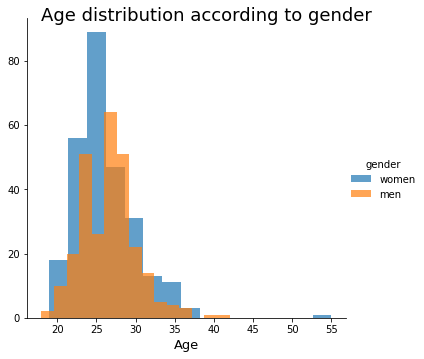

In [11]:
Ф = sns.FacetGrid(data_clean, hue = 'gender', height = 5)
Ф.map(plt.hist, 'age', alpha = 0.7, bins = 15)
Ф.set_xlabels('Age', fontsize = 13)
plt.subplots_adjust(top = 0.95)
Ф.fig.suptitle('Age distribution according to gender', fontsize = 18)
Ф.add_legend()

In [12]:
data_clean[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max','count'])

age                         
             mean median   min   max count
gender                                    
men     26.587591   27.0  18.0  42.0   274
women   26.126394   26.0  19.0  55.0   269

Text(0.5, 0, '')

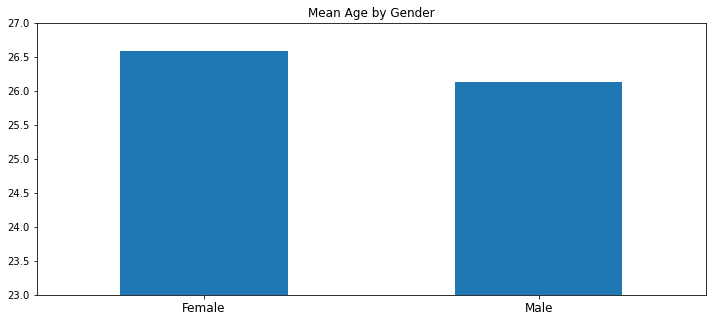

In [13]:
ax = data_clean[['gender', 'age']].groupby('gender').mean()\
                                    .plot(kind='bar', figsize=(12,5), legend=False, 
                                          title='Mean Age by Gender',
                                          ylim=(23,27))

ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')

ax.set_xlabel('', fontsize=1)

Let's have a further look into the race of the participants regardless of gender, having dropped the unique characteristics, the repartition has shifted.

We know the data has been collected in South Carolina, upon further research we noticed it was specifically in Lexington county. The county data for 2004 can be found [here](https://datacenter.kidscount.org/data/tables/6129-total-population-by-race-ethnicity#detailed/5/6339/false/1729,37,871,870,573,869,36,16,15,14/66,67,4262,3,2700/12801,15648)

We can therefore say the data collected might not be the best representative of minorites as in Lexington county in 2004:

- 80% were white/caucasian
- 14.2% were Black/ African American
- 3,3% were Hispanic
- 1,7% accounted for the rest 

There is a over-representation of Asian and other minorities, could this be induced by the studies ? 

In [14]:
data_clean['race'] = data_clean.race.map({1 : 'Black', 2: "White", 3: 'Hispanic',
                                          4: 'Asian', 6: 'Other'}).fillna(data_clean.race)
data['race'] = data.race.map({1 : 'Black', 2: "White", 3: 'Hispanic',
                                          4: 'Asian', 6: 'Other'}).fillna(data.race)
data['race_o'] = data.race_o.map({1 : 'Black', 2: "White", 3: 'Hispanic',
                                          4: 'Asian', 6: 'Other'}).fillna(data.race_o)
race = data_clean.race.value_counts(dropna=False)

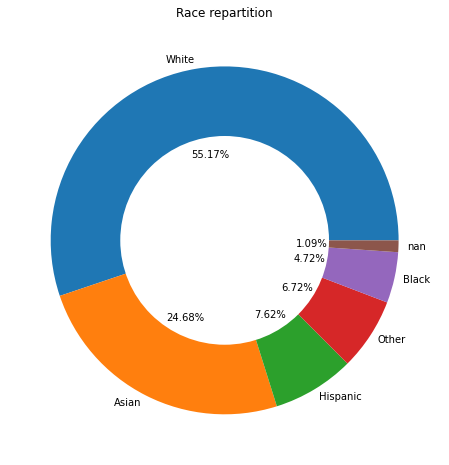

In [15]:
plt.figure(figsize=(16,8))
data_clean.race.value_counts(dropna=False).plot(kind='pie',autopct='%1.2f%%',pctdistance=0.50, labeldistance=1.05)
plt.title('Race repartition')
plt.ylabel("")
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### **However, the main focus we're trying to clear out is the importance of features leading to the second date.**

Let's suppose we focus on participants that met again after a first date solely.
Therefore we look for a _decision = yes_ and met _before = no._

We'll take into account after the scoring that was given to participants to see if there's any noticeable difference 

In [16]:
attribute_filter = ['dec','attr','sinc','intel','fun','amb','shar']
second_date_filter = (data["dec"]==1) & (data["met"]==2)

data_feature_clean = data.loc[second_date_filter, attribute_filter]
data_feature_clean
#We need to sum these features to acknowledge their importance

feature_importance = data_feature_clean.groupby(["dec"])\
                                        .sum().transpose()\
                                        .sort_values(by=1,ascending=False)\
                                        .reset_index()
    
feature_importance.columns = ['attributes', 'sum']

feature_importance_mean = data_feature_clean.groupby(["dec"])\
                                        .mean().transpose()\
                                        .sort_values(by=1,ascending=False)\
                                        .reset_index()
    
feature_importance_mean.columns = ['attributes', 'sum']

feature_importance, feature_importance_mean


(  attributes      sum
 0      intel  11741.0
 1       sinc  11616.0
 2       attr  11171.5
 3        fun  10858.5
 4        amb  10138.5
 5       shar   8441.5,
   attributes       sum
 0      intel  7.714192
 1       sinc  7.612058
 2       attr  7.268380
 3        fun  7.263211
 4        amb  7.165018
 5       shar  6.366139)

Text(0.5, 1.0, 'Attributes ranking with yes for a 2nd date and never met before')

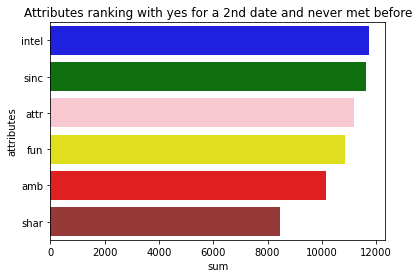

In [17]:
palette_dict = {'intel':'blue', 'sinc':'green', 'attr':'pink', 'fun':'yellow','amb':'red','shar':'brown'}
g = sns.barplot(x="sum", y="attributes", data=feature_importance,
            label="Total", palette = palette_dict)
g.set_title('Attributes ranking with yes for a 2nd date and never met before')

In [18]:
attribute_filter = ['dec','attr','sinc','intel','fun','amb','shar']
second_date_filter = (data["dec"]==1) & (data["met"]==2)

data_feature_clean = data.loc[second_date_filter, attribute_filter]
data_feature_clean
#We need to sum these features to acknowledge their importance

feature_importance_mean = data_feature_clean.groupby(["dec"])\
                                        .mean().transpose()\
                                        .sort_values(by=1,ascending=False)\
                                        .reset_index()
    
feature_importance.columns = ['attributes', 'sum']
feature_importance_mean

dec,index,1
0,intel,7.714192
1,sinc,7.612058
2,attr,7.268380
3,fun,7.263211
4,amb,7.165018
5,shar,6.366139


### _Could the result be induced by the fact that during wave 6 to 9 included, participants would rate out attributes out of 10 points instead of 100 ?_

Let's check it out


In [19]:
data_feature = data.copy()

In [20]:
attribute_filter = ['dec','attr','sinc','intel','fun','amb','shar']
second_date_filter = (data["dec"]==1) & (data["met"]==2) & (data["wave"] != 6) & (data["wave"] != 7) & (data["wave"] != 8) & (data["wave"] != 9)

data_feature_clean = data_feature.loc[second_date_filter, attribute_filter]
data_feature_clean
#We need to sum these features to acknowledge their importance

feature_importance = data_feature_clean.groupby(["dec"])\
                                        .sum().transpose()\
                                        .sort_values(by=1,ascending=False)\
                                        .reset_index()

feature_importance.columns = ['attributes', 'sum']
feature_importance

feature_importance_mean = data_feature_clean.groupby(["dec"])\
                                            .mean().transpose()\
                                            .sort_values(by=1,ascending=False)\
                                            .reset_index()
    
feature_importance_mean.columns = ['attributes', 'sum']
feature_importance, feature_importance_mean

(  attributes     sum
 0      intel  8653.0
 1       sinc  8573.0
 2       attr  8192.0
 3        fun  7972.5
 4        amb  7327.5
 5       shar  6146.5,
   attributes       sum
 0      intel  7.712121
 1       sinc  7.634016
 2        fun  7.254322
 3       attr  7.236749
 4        amb  7.134859
 5       shar  6.362836)

Text(0.5, 1.0, 'Attributes ranking on 100 points')

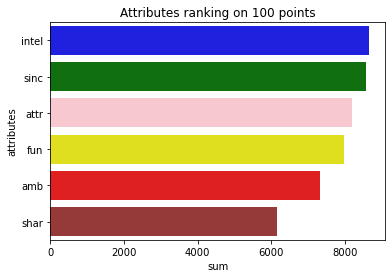

In [21]:
g = sns.barplot(x="sum", y="attributes", data=feature_importance,
            label="Total", palette = palette_dict)
g.set_title('Attributes ranking on 100 points')

According to the scorecard, we'll focus therefore on the key attributes 
* Attractive
* Sincere
* Intelligent
* Fun
* Ambitious
* Shared interests/hobbies

**We can notice as well the fact that participants that were given 10 points instead of 100 points during wave 6 to 9 didn't shift our results noticeably either.**

Let's check one last assumption as attributes importance have been verified


Supposingly someone that says yes to another might have a high level of confidence that the second person would say yes to a second date. 

Let's check this taking into account a comfortable confidence level would be anywhere around **70%** while considering he didn't really like the person overall **(<40%)**

In [22]:
attribute_filter = ['dec','attr','sinc','intel','fun','amb','shar']
second_date_filter = (data["dec"]==1) & (data['like'] <= 4) & (data['prob'] >= 7)

data_feature_clean = data_feature.loc[second_date_filter, attribute_filter]
data_feature_clean
#We need to sum these features to acknowledge their importance

feature_importance = data_feature_clean.groupby(["dec"])\
                                        .sum().transpose()\
                                        .sort_values(by=1,ascending=False)\
                                        .reset_index()

feature_importance.columns = ['attributes', 'sum']
feature_importance

,attributes,sum
0,amb,57.0
1,intel,56.0
2,sinc,53.0
3,fun,46.0
4,attr,33.0
5,shar,31.0


Text(0.5, 1.0, 'Attributes ranking on 1st personae')

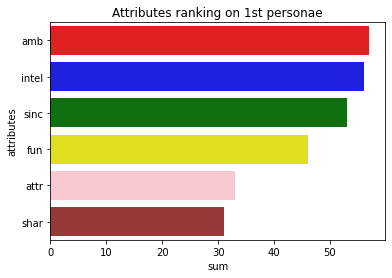

In [23]:
g = sns.barplot(x="sum", y="attributes", data=feature_importance,
            label="Total", palette = palette_dict)
g.set_title('Attributes ranking on 1st personae')

Let's observe a second personae 
- Said yes, likes the person at more than **60%**, but thinks the person will probably say yes at **(<40%)**

In [24]:
attribute_filter = ['dec','attr','sinc','intel','fun','amb','shar']
second_date_filter = (data["dec"]==1) & (data['like'] >= 6) & (data['prob'] <= 4)

data_feature_clean = data_feature.loc[second_date_filter, attribute_filter]
data_feature_clean
#We need to sum these features to acknowledge their importance

feature_importance = data_feature_clean.groupby(["dec"])\
                                        .sum().transpose()\
                                        .sort_values(by=1,ascending=False)\
                                        .reset_index()

feature_importance.columns = ['attributes', 'sum']
feature_importance

,attributes,sum
0,intel,3819.0
1,attr,3746.0
2,sinc,3667.0
3,fun,3334.0
4,amb,3070.0
5,shar,2399.0


Text(0.5, 1.0, 'Attributes ranking on 2nd personae')

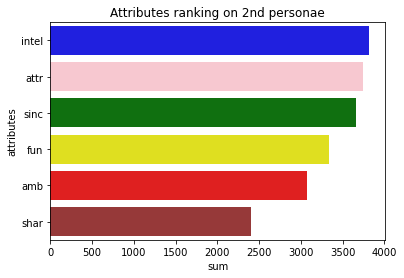

In [25]:
g = sns.barplot(x="sum", y="attributes", data=feature_importance,
            label="Total", palette = palette_dict)
g.set_title('Attributes ranking on 2nd personae')

## Conclusion 
We've managed to highlight the main attributes that are valued in someone 
1. Intelligence
2. Sincerity
3. Attractiveness
4. Fun
5. Ambitious
6. Shared interests/Hobbies


Regarding the first personnae, someone that doesn't really like the person in front of him but is confident he/she will say yes, the ranking differs
1. Ambitious
2. Intelligent
3. Sincerity
4. Fun
5. Attractiveness
6. Shared interests/Hobbies

Regarding the last personnae, someone that liked the person, but isn't really confident in the fact he/she will say yes, the ranking differs again. 
1. Intelligence 
2. Attractiveness
3. Sincerity
4. Fun
5. Ambitious
6. Shared interests/Hobbies

## Conclusion 

We notice the top 3 attributes are reccurent with the 2nd personnae, however the 1st personnae involving a high self-esteem, looks out in his/her partner for ambition. 

It could be linked to his/her own trait

### Going further

To go further in this analysis, we could balance out the minority weights and try to lower the Asian American representation